# Домашнее задание 4 v.2

## Козел А.Г. 21.09.2022

### С использованием библиотек Numpy и Pandas написать программу реализующую:
1.	Загрузку текстового файла из корневого каталога объемом не менее 20000 символов включая пробелы и все символы.
2.	Подсчет частоты встречаемости слов в загруженном файле (критерий схожести слов выбрать самостоятельно).
3.	Подсчет длин предложений и их количества.
4.	Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".
5.	Построение гистограммы частоты встречаемости слов.

p.s. Рекомендую перед решением задания проанализировать задачу и обосновать алгоритм ее решения в текстовом виде. В процессе написания кода использовать комментарии.



### 1. Загрузкa текстового файла из корневого каталога 

In [43]:
with open('text.txt', encoding="utf8") as f:
    book = f.read()

In [44]:
#импорт требуемых библиотек
import numpy as np
import pandas as pd
import re
import string
from string import punctuation

from collections import Counter
from langdetect import detect_langs 

import pymorphy2
morph = pymorphy2.MorphAnalyzer() #добавление анализатора для морфологического анализа текста

import spacy 
from spacy.lang.ru.stop_words import STOP_WORDS
import ru_core_news_sm
nlp = spacy.load("ru_core_news_sm")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Подсчет частоты встречаемости слов

In [71]:
book_result = re.sub(r'\d+', '', book)
doc = nlp(book_result)
# Лемматизация и конвертация токенов в нижний регистр
book_lemm = [ word.lemma_.lower().strip()
             if word.lemma_ != "-PRON-" 
             else word.lower_ for word in doc]
punctuations = string.punctuation + '–' # к списку пунктуации добавляем тире
#цикл проверяет не является ли слово в документе стоп-словом или знаком пунктуации
book_result = [word for word in book_lemm
               if word not in STOP_WORDS 
               and word not in punctuations]
# Считаем уникальные слова
count_words = Counter(book_result)
print('Количество уникальных слов в тексте: '
      '{}.\n'.format(len(count_words)))

Количество уникальных слов в тексте: 926.



In [70]:
# Выводим самые популярные 20 слов
count_words.most_common(20)

[('основание', 117),
 ('упругий', 75),
 ('модель', 70),
 ('пластина', 68),
 ('винклера', 36),
 ('решение', 29),
 ('пастернак', 28),
 ('получить', 26),
 ('работа', 25),
 ('слой', 23),
 ('исследовать', 23),
 ('нагрузка', 22),
 ('метод', 20),
 ('толщина', 19),
 ('колебание', 19),
 ('деформирование', 18),
 ('рассмотреть', 18),
 ('численный', 18),
 ('расчёт', 17),
 ('уравнение', 17)]

### 3. Подсчет длин предложений и их количества.

In [79]:
sentence_doc = [] 
sentence_length = []

#цикл заполняет списки предложениями и количеством слов в них
for sentence in doc.sents:
    sentence_doc.append(sentence)
    sentence_length.append(len(sentence))
    
df_sents = pd.DataFrame({'Sentence': sentence_doc, 
                   'Sentence_length': sentence_length })

In [80]:
display(df_sents)

,Sentence,Sentence_length
0,"(В, настоящее, время, расчет, и, проектировани...",65
1,"(Вопросу, расчета, конструкций, на, упругом, о...",11
2,"(Для, описания, свойств, деформируемого, основ...",23
3,"(В, течение, долгого, времени, единственной, р...",20
4,"(Предпосылки, этой, модели, впервые, были, сфо...",48
...,...,...
207,"(В, результате, численного, параметрического, ...",25
208,"(Таким, образом, ,, статическое, деформировани...",22
209,"(Поэтому, для, дальнейших, исследований, автор...",19
210,"(Выводы, .)",2


### 4. Ввод полученных данных в объект DataFrame и Series, а также отображение полученных результатов в виде таблицы "объекты - признаки".

In [87]:
Word_Data=pd.DataFrame({'Word': book_result})

mf = Word_Data['Word'].value_counts()
mf.head(20)



основание         117
упругий            75
модель             70
пластина           68
винклера           36
решение            29
пастернак          28
получить           26
работа             25
слой               23
исследовать        23
нагрузка           22
метод              20
толщина            19
колебание          19
численный          18
деформирование     18
рассмотреть        18
уравнение          17
расчёт             17
Name: Word, dtype: int64

### 5. Построение гистограммы частоты встречаемости слов.

<AxesSubplot:title={'center':'Самые популярные слова?'}, xlabel='Word', ylabel='Word'>

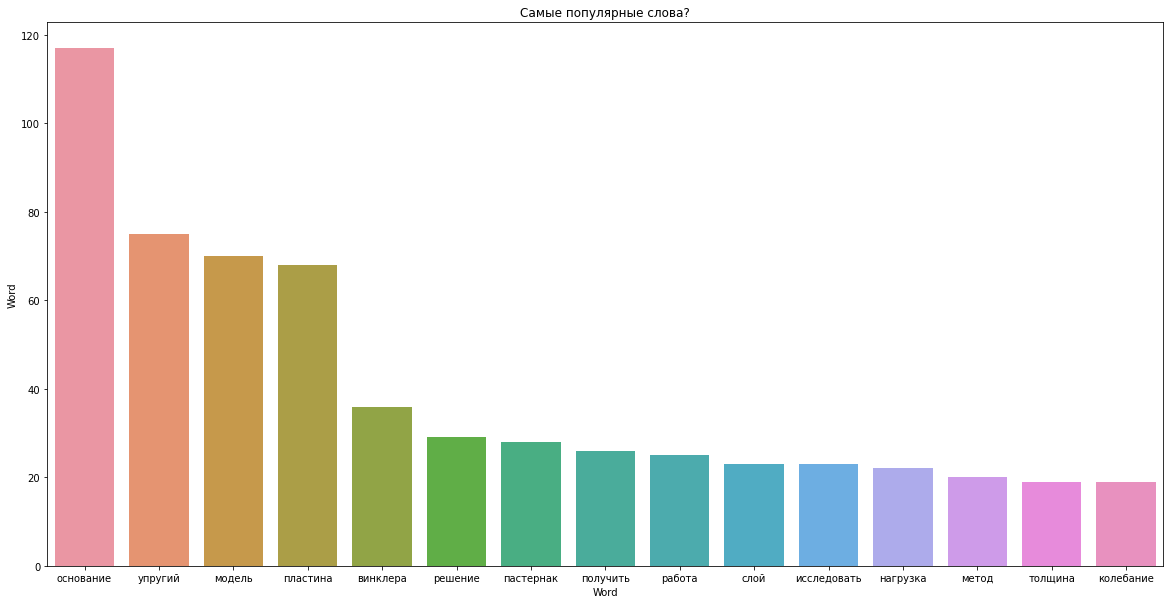

In [97]:
plt.figure(figsize=(20,10))
plt.title("Самые популярные слова?")
plt.ylabel('Frequency')
plt.xlabel("Word")

x=15 # Переменная для определения, частоту скольких первых слов отобразить на графике
sns.barplot(x=mf.head(x).index, y=mf.head(x))

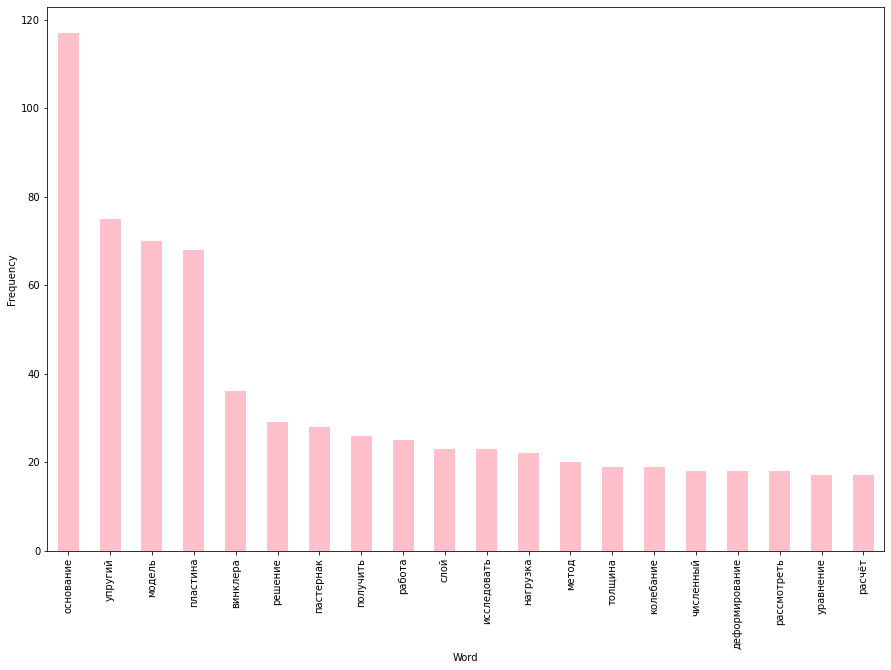

In [98]:
mf.head(20).plot(x ='Word', y='Frequency', kind = 'bar', color = 'pink', figsize=(15, 10))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()